### 三次样条插值法
- 每个区间用一个三次多项式来表示，通常情况下是需要4个条件。虽然我们只知道函数值，并不知道导数值，但是知道在区间端点的两个一阶导数和二阶导数都是相等的，所以会增加一些条件。
- 我们知道，我们要求解的参数值是有4n但是只有4n-2个方程，所以要额外地增加两个参数，比如边界的一阶导数值和边界的二阶导数值等方法。这样子就构建了4n个方程，有4n个未知数。该方法求解的计算量比较大。
- 针对上诉的问题，我可以去假设函数的二阶导数值已知，那么对于一个区间，我可以用求积分的形式来求得函数的表达式。

In [52]:
### 使用三次样条插值法求解 f(x) = 1 / (1 + x^2)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import *
from numpy.linalg import *

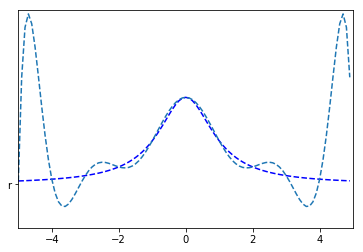

In [53]:
x = np.arange(-5,6,1)
y = fun(x)
arr = np.vstack((x,y)).T

test_x = np.arange(-5,5,0.1)
test_xy = newton(arr,test_x)
#### 
plt.xlim(-5,5)
plt.ylim(-0.5,2)
plt.plot(test_x,fun(test_x),'--',c = 'b')
plt.plot(test_xy[:,0],test_xy[:,1],'--','r')

In [54]:
size = len(x)
### 起点和终点的导数
y0 = -2 * x[0] / (( 1 + x[0] **2) ** 2) ## 
yn = -2 * x[size - 1] / (( 1 + x[size - 1] **2) ** 2)

![三次样条插值](img/三次样条插值1.png)
- 其中$h_{j}=x_{j+1}-x_{j}$ 这里的$j$是从$(1,n-1)$开始的

In [55]:
u_lb_d = []
for j in range(1,size - 1):
    hj = x[j + 1] - x[j]
    hj_1 = x[j] - x[j - 1]
    
    u = hj_1 / (hj_1 + hj)
    lb = hj / (hj_1 + hj)
    d = 6 / (hj_1 + hj) * ((y[j + 1] - y[j]) / hj - (y[j] - y[j - 1] / hj_1))
    u_lb_d.append((u,lb,d))

![三次样条插值2](img/三次样条插值2.png)

In [56]:
# 算出满足边界条件的值
d_0 = 6 / (x[1] - x[0]) * ( (y[1] - y[0]) / (x[1] - x[0]) - y0)
d_n = 6 / (x[size - 1] - x[size - 2]) * (yn - ((y[size - 1] - y[size - 2]) / (x[size - 1] - x[size - 2])))

![三次样条插值4.png](img/三次样条插值4.png)

![三次样条插值3.png](img/三次样条插值3.png)

In [57]:
A = np.zeros((size,size))
A[0][0] = 2; A[0][1] = 1
A[size - 1][size - 2] = 1
A[size - 1][size - 1] = 2
d = []
d.append(d_0)
for i,u_lb_d_i in enumerate(u_lb_d):
    A[i + 1][i] = u_lb_d_i[0]
    A[i + 1][i + 1] = 2
    A[i + 1][i + 2] = u_lb_d_i[1]
    d.append(u_lb_d_i[2])
d.append(d_n)

In [58]:
M = np.dot(inv(A),d)

In [59]:
M

array([ 0.00982219,  0.01377018,  0.05998398,  0.09923508,  0.74307569,
       -1.87153785,  0.74307569,  0.09923508,  0.05998398,  0.01377018,
        0.00982219])

![三次样条插值5.png](img/三次样条插值5.png)

In [60]:
len(x)

11

In [61]:
pred_y = []
for test_x_i in test_x:
    ## 判断在哪个区间
    j = -1
    for i in range(len(x) - 1):
        if test_x_i >= x[i] and test_x_i <= x[i + 1]:
            j = i;
            break;
    #### 代入对应区间的表达式进行求解
    hj = x[j + 1] - x[j]
    y_ = ((x[j + 1] - test_x_i)**3 * M[j]  + (test_x_i - x[j]) **3 * M[j + 1]) / (6 * hj) + (y[j] - M[j] * hj **2 / 6) * (x[j + 1] - test_x_i) / hj + (y[j + 1] - M[j + 1] * hj **2 / 6) * (test_x_i - x[j]) / hj 
    pred_y.append(y_)

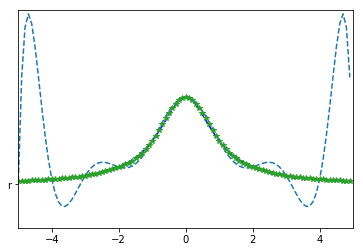

In [62]:
plt.xlim(-5,5)
plt.ylim(-0.5,2)
plt.plot(test_x,fun(test_x),'--',c = 'b')
plt.plot(test_xy[:,0],test_xy[:,1],'--','r')
plt.plot(test_x,pred_y,'*','r')

### 真的完全拟合原来的数据，三次样条插值法是真的强大啊
- 该方法是一个全局方法，改动一点原始数据就需要重新计算M矩阵，
- 而hermit插值是不需要的，其只需要进行局部修改。

## 插值方法比较
![插值方法比较](img/插值方法比较.png)